In [2]:
import tensorflow as tf 
from tensorflow.keras import layers,models


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [4]:
path='./datasets/handwriting/'
labels = os.listdir(path)
labels

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [5]:
#build image paths
image_paths = []
digit_labels = []
for digit_label in labels:
    for filename in os.listdir(path+digit_label):
        image_paths.append(path+digit_label+'/'+filename)
        digit_labels.append(digit_label)

In [6]:
len(image_paths)

21555

In [7]:
image_paths[:10]

['./datasets/handwriting/0/Zero_full (1).jpg',
 './datasets/handwriting/0/Zero_full (10).jpg',
 './datasets/handwriting/0/Zero_full (100).jpg',
 './datasets/handwriting/0/Zero_full (1000).jpg',
 './datasets/handwriting/0/Zero_full (1001).jpg',
 './datasets/handwriting/0/Zero_full (1002).jpg',
 './datasets/handwriting/0/Zero_full (1003).jpg',
 './datasets/handwriting/0/Zero_full (1004).jpg',
 './datasets/handwriting/0/Zero_full (1005).jpg',
 './datasets/handwriting/0/Zero_full (1006).jpg']

In [8]:
def showImg(imagePaths,labels):
    plt.figure(figsize=(50,50))
    for i in range(len(imagePaths)):
        sp = plt.subplot(6,5,i+1)
        sp.axis('off')
        img=mpimg.imread(imagePaths[i])
        plt.imshow(img)
        plt.title(labels[i],fontsize=60)
    plt.show()

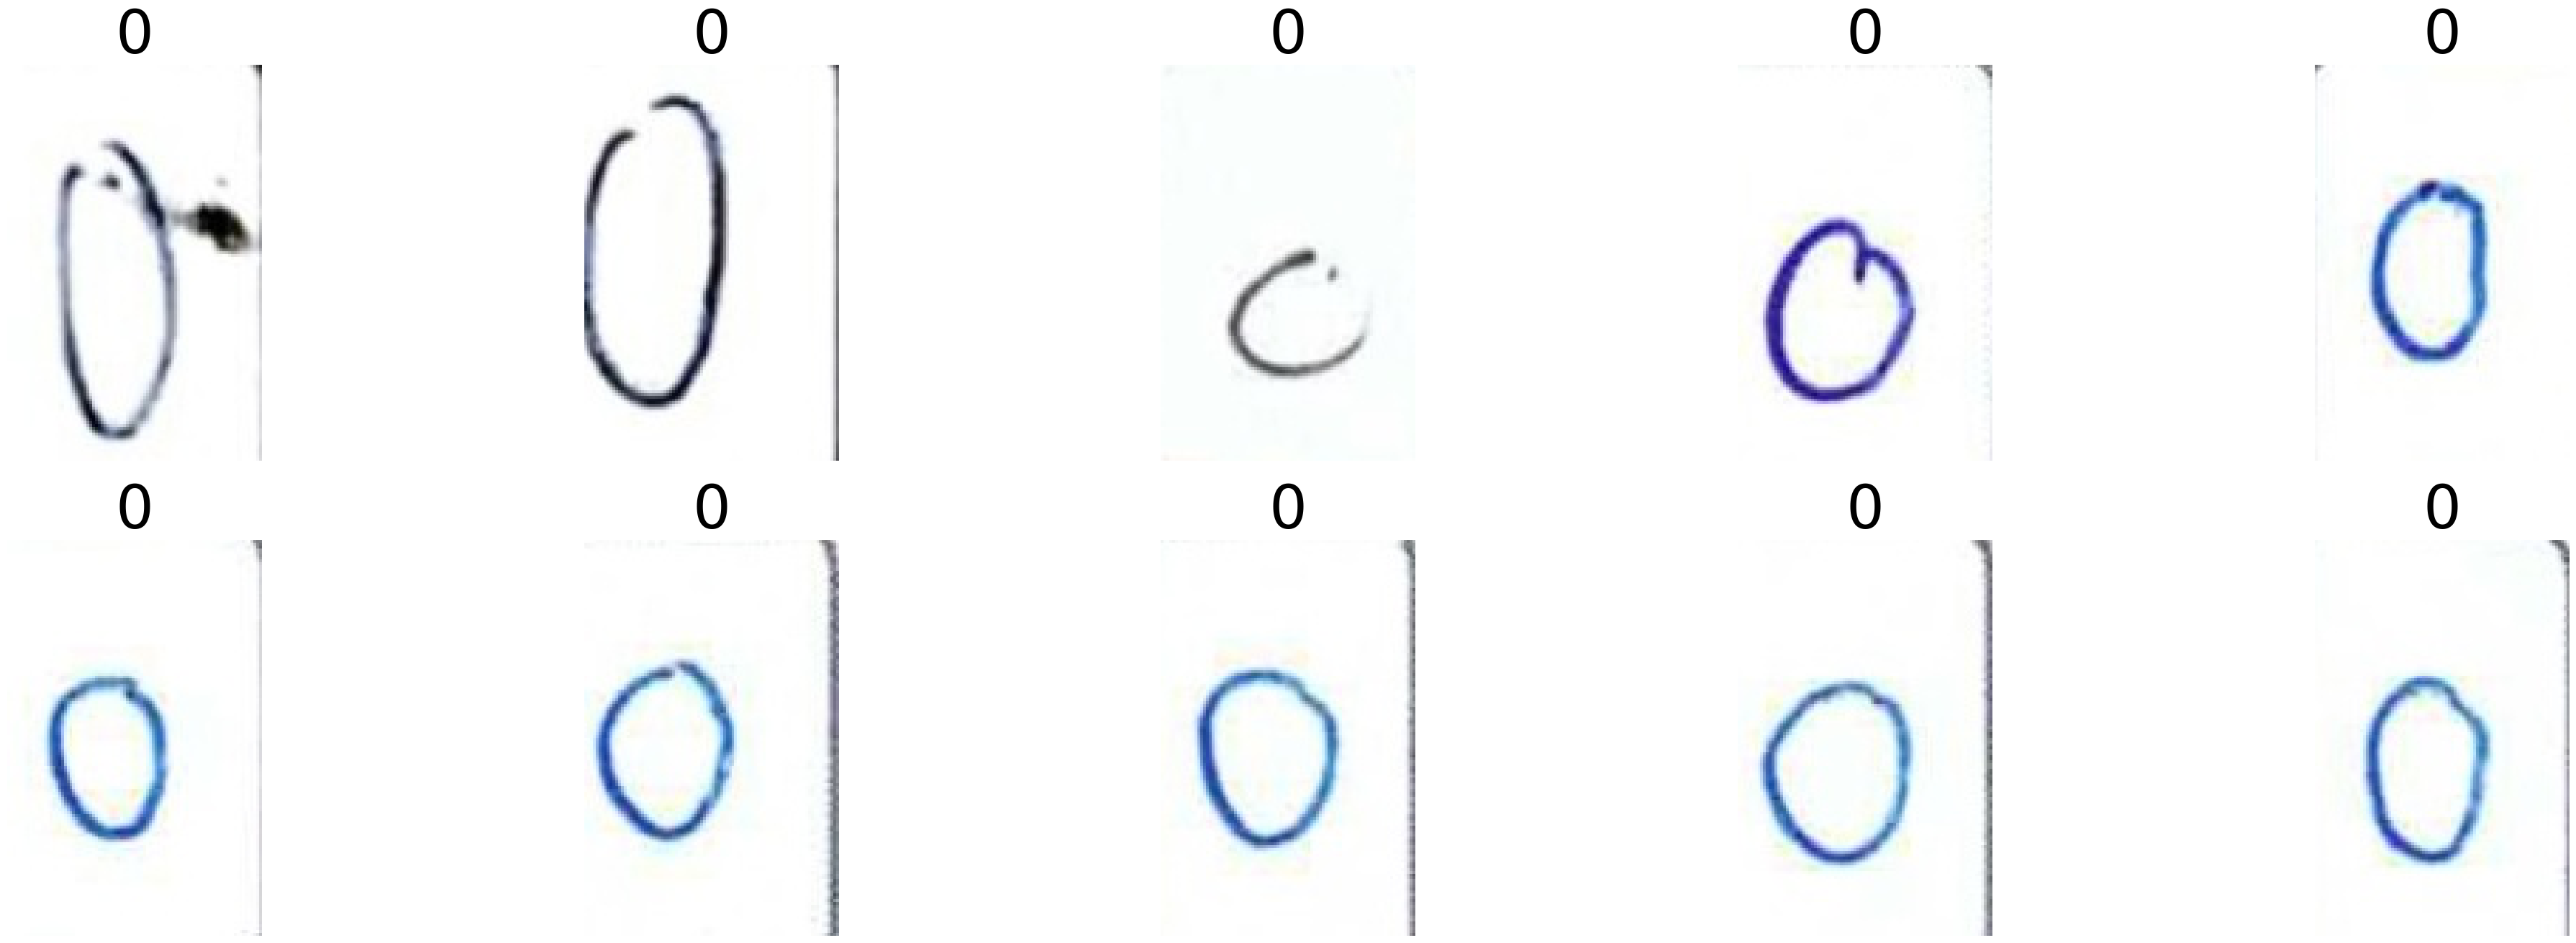

In [9]:
showImg(image_paths[:10],digit_labels[:10])

In [10]:
#convert single images numpy arrays
from tensorflow.keras.preprocessing.image import load_img,img_to_array
#load image
def image_to_our_array(image_path):
    img= load_img(image_path)
#converting the image to numpy array
    img_array = img_to_array(img)

#converting the color image to grayscale
    grayscale_image = np.mean(img_array,axis=-1)
#Normalie the pixel to 0 and 1
    img_array = grayscale_image/255.0
    return img_array

In [11]:
img_array=image_to_our_array(image_paths[0])
img_array.shape

(140, 90)

In [12]:
#partial data 
#IMAGE_NUMS = 1000
#full data
IMAGE_NUMS = len(image_paths)
IMAGE_NUMS

21555

In [13]:
#load pickle obj which has images to np array obj.
import pickle
train_images_data=[]
with open('./images_to_array.pkl', 'rb') as file:
    train_images_data = pickle.load(file)
train_images_data = np.array(train_images_data)

In [14]:
# #convert all images to numpy array
# # Convert all images to numpy array
# # Load the image
# train_images_data = [] 
# for imageFile in image_paths[:IMAGE_NUMS]: 
#     # Load image 
#     img = load_img(imageFile, target_size=(140, 90)) # You can adjust the target
    
#     # Convert the image to a NumPy array 
#     img_array = img_to_array(img) 
    
#     # Convert the color image to grayscale 
#     grayscale_image = np.mean(img_array, axis=-1) 
    
#     # Normalize the pixel values to [0, 1] 
#     img_array = grayscale_image / 255.0 
    
#     # append to train_images_data[] 
#     train_images_data.append(img_array) 

# #convert list to np array 
# train_images_data = np.array(train_images_data)

In [15]:
train_images_data,len(train_images_data)

(array([[[1.        , 1.        , 1.        , ..., 0.54901963,
          0.28627452, 0.12156863],
         [1.        , 1.        , 1.        , ..., 0.7137255 ,
          0.42745098, 0.22745098],
         [1.        , 1.        , 1.        , ..., 0.8352941 ,
          0.5764706 , 0.32941177],
         ...,
         [1.        , 1.        , 1.        , ..., 0.99607843,
          0.951634  , 0.84575164],
         [1.        , 1.        , 1.        , ..., 0.99607843,
          0.9594771 , 0.8535948 ],
         [1.        , 1.        , 1.        , ..., 0.99607843,
          0.96732026, 0.8614379 ]],
 
        [[0.99607843, 0.99215686, 0.9882353 , ..., 0.68496734,
          0.4509804 , 0.2784314 ],
         [1.        , 1.        , 0.99607843, ..., 0.84575164,
          0.6117647 , 0.4       ],
         [1.        , 1.        , 1.        , ..., 0.9398693 ,
          0.75555557, 0.5019608 ],
         ...,
         [1.        , 1.        , 1.        , ..., 0.93202615,
          0.7124183 , 0.

In [16]:
#saved images model inorder to stop re transformation  of image everytime.
# import pickle
# with open('./images_to_array.pkl', 'wb') as file:
#     pickle.dump(train_images_data, file)

In [17]:
type(train_images_data)

numpy.ndarray

In [18]:
from sklearn.model_selection import train_test_split
train_images , test_images , train_labels, test_labels = train_test_split(train_images_data,digit_labels[:IMAGE_NUMS],test_size=0.2,random_state=42)
len(train_images),len(train_labels)

(17244, 17244)

In [19]:
train_labels[:5]

['8', '7', '0', '6', '2']

In [20]:
train_images[:5]

array([[[0.9019608 , 0.92941177, 0.93333334, ..., 0.43137255,
         0.47058824, 0.6666667 ],
        [0.972549  , 0.99607843, 0.99607843, ..., 0.39607844,
         0.3882353 , 0.5137255 ],
        [0.9751634 , 0.99477124, 0.99477124, ..., 0.4117647 ,
         0.42745098, 0.46666667],
        ...,
        [0.99607843, 0.99607843, 0.99607843, ..., 0.97908497,
         0.99607843, 0.94640523],
        [0.99607843, 0.99607843, 0.99607843, ..., 0.97908497,
         0.97908497, 0.91895425],
        [0.99607843, 0.99607843, 0.99607843, ..., 0.9751634 ,
         0.9908497 , 0.9346405 ]],

       [[0.9843137 , 0.9882353 , 0.9882353 , ..., 0.99607843,
         0.9843137 , 0.9843137 ],
        [0.98039216, 0.98039216, 0.9764706 , ..., 0.99607843,
         0.99215686, 0.99215686],
        [0.98039216, 0.9764706 , 0.972549  , ..., 0.99607843,
         0.9843137 , 0.9843137 ],
        ...,
        [0.98039216, 0.9843137 , 0.9882353 , ..., 0.9843137 ,
         0.99215686, 0.99607843],
        [0.9

In [21]:
train_images[0].shape

(140, 90)

In [22]:
def show_images(images, labels):
    i = 0
    for img, lab in zip(images, labels):
        plt.subplot(1, len(labels), i+1)
        plt.imshow(img, cmap='gray')
        plt.title(f"image - {lab}")
        plt.axis("off")
        i =i+1
    plt.show()

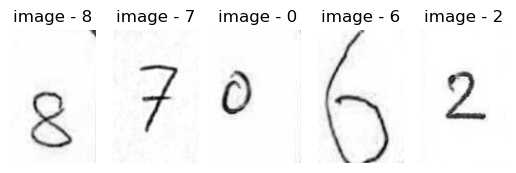

In [23]:
show_images(train_images[:5],train_labels[:5])

In [24]:
model = models.Sequential([
    layers.Conv2D(filters=25,kernel_size=(3,3),activation='relu',input_shape=(140, 90,1)),
    layers.MaxPooling2D((2,2)),
    #layer2
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    #layer3
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [25]:
#compile
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [26]:
#convert labels to int numpy array
train_labels=np.array(train_labels,dtype=int)

In [27]:
test_labels=np.array(test_labels,dtype=int)

In [28]:
test_labels[:4] , type(test_labels)

(array([3, 5, 1, 5]), numpy.ndarray)

In [29]:
train_labels[:4] , type(train_labels)

(array([8, 7, 0, 6]), numpy.ndarray)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.01,
    patience=8,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [31]:
#train
#model.fit(train_images,train_labels,epochs=10,batch_size=64,validation_split=0.2,callbacks=early_stopping)
model=tf.keras.models.load_model('./digit_model1.h5')

In [32]:
trains_loss,train_acc=model.evaluate(train_images,train_labels)
print(f"Train Accuracy : {train_acc}")


539/539 [==============================] - 26s 46ms/step - loss: 0.1011 - accuracy: 0.9758
Train Accuracy : 0.9757596850395203


In [33]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print(f"Train Accuracy : {test_acc}")

135/135 [==============================] - 6s 47ms/step - loss: 0.2911 - accuracy: 0.9344
Train Accuracy : 0.9343540072441101


In [34]:
#model.save('digit_model1.h5')

In [35]:
preds=model.predict(test_images)

135/135 [==============================] - 7s 51ms/step


In [36]:
test_images.shape , test_images[0].shape

((4311, 140, 90), (140, 90))

In [37]:
preds.shape

(4311, 10)

In [38]:
preds[0].argmax()

3

In [39]:
test_labels[0]

3

In [40]:
preds.shape , test_labels.shape

((4311, 10), (4311,))

In [41]:
preds[1].argmax() , test_labels[1]

(5, 5)

In [42]:
ans = []
for i in range(len(preds)) :
    ans.append(preds[i].argmax())
ans = np.array(ans,dtype=int)

In [43]:
ans,test_labels

(array([3, 5, 1, ..., 4, 0, 3]), array([3, 5, 1, ..., 4, 0, 3]))

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels,ans)

0.9343539781953143

In [45]:
boolean_ans=[]
for i in range(len(test_labels)) :
    boolean_ans.append(test_labels[i]==ans[i])
boolean_ans=np.array(boolean_ans,dtype=int)

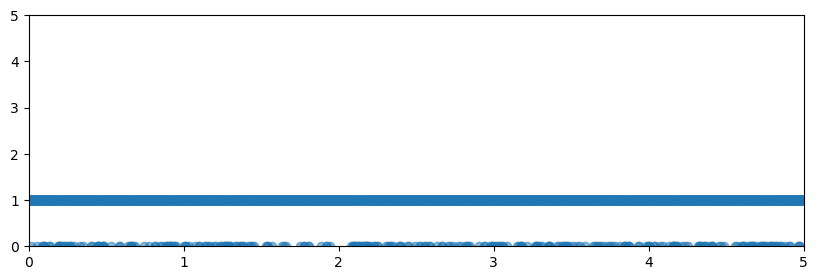

In [46]:
x_values = np.linspace(0, 5, len(boolean_ans))
fig , ax =plt.subplots(figsize=(10,3))
ax.scatter(x_values, boolean_ans, alpha=0.5)
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
plt.show()

In [47]:
#prediction of single img :
image_array=image_to_our_array(image_paths[1])
image_array.shape

(140, 90)

In [48]:

# Assuming your single image is stored in the variable 'single_image'
single_image = image_array  # Your image data

# Add an extra dimension to represent the single channel
# single_image = np.expand_dims(single_image, axis=-1)

# Add an extra dimension to represent the batch size
single_image = np.expand_dims(single_image, axis=0)

# Now, 'single_image' has the shape (1, 140, 90, 1), which can be used for prediction
predictions = model.predict(single_image)


1/1 [==============================] - 0s 44ms/step


In [49]:
predictions.argmax()

0

In [50]:
from PIL import Image

# Assuming 'image_path' is the path to your image
image = Image.open('./five.jpg')
# Convert the image to grayscale
gray_image = image.convert("L")

# Resize the image to (28, 28)
resized_image = gray_image.resize((140,90))

# Convert the PIL Image to a NumPy array
image_array = np.array(resized_image)
duplicate = np.array(resized_image)

# Add the channel dimension (reshape to (28, 28, 1))
image_array = image_array.reshape((140,90,1))

# Normalize the pixel values to be between 0 and 1 (if needed)
image_array = image_array / 255

# Now, 'image_array' has the shape (28, 28, 1) and is ready to be used as input for your model
image_array.shape

(140, 90, 1)

In [51]:
image_array=np.expand_dims(image_array,axis=0)
prediction = model.predict(image_array)
x_label =prediction.argmax()

1/1 [==============================] - 0s 129ms/step


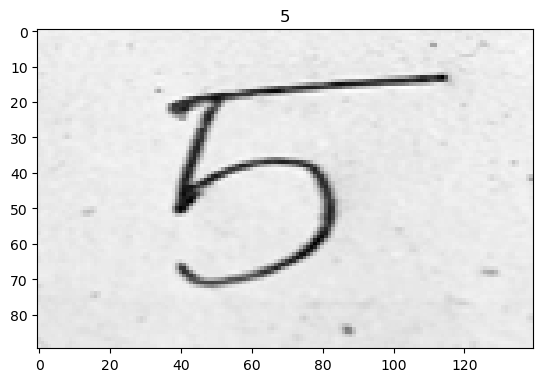

In [52]:
plt.title(x_label)
plt.imshow(duplicate,cmap='gray')

In [53]:
def show_image_with_boxes(image_path, boxes):
    img = cv2.imread(image_path)
    for box in boxes:
        x, y, w, h = box
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
plt.show()

In [54]:
image_path = './small-digits.jpg'

In [55]:
image = cv2.imread(image_path)
img1 = np.array(image)
img1

array([[[212, 219, 222],
        [214, 221, 224],
        [215, 222, 225],
        ...,
        [216, 221, 222],
        [217, 222, 223],
        [218, 223, 224]],

       [[212, 219, 222],
        [213, 220, 223],
        [214, 221, 224],
        ...,
        [213, 218, 219],
        [214, 219, 220],
        [215, 220, 221]],

       [[213, 220, 223],
        [213, 220, 223],
        [214, 221, 224],
        ...,
        [213, 218, 219],
        [214, 219, 220],
        [215, 220, 221]],

       ...,

       [[211, 218, 221],
        [210, 217, 220],
        [209, 216, 219],
        ...,
        [209, 216, 219],
        [210, 217, 220],
        [211, 218, 221]],

       [[209, 216, 219],
        [209, 216, 219],
        [209, 216, 219],
        ...,
        [209, 216, 219],
        [210, 217, 220],
        [210, 217, 220]],

       [[206, 213, 216],
        [207, 214, 217],
        [209, 216, 219],
        ...,
        [209, 216, 219],
        [209, 216, 219],
        [209, 216, 219]]

In [56]:
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

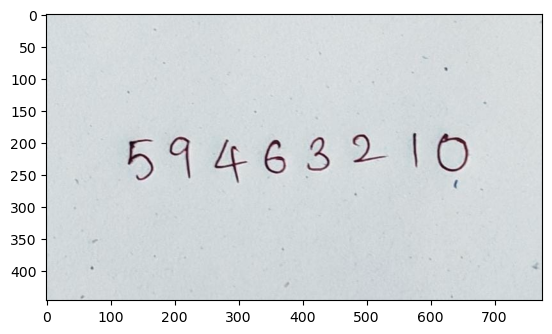

In [57]:
plt.imshow(img)

In [58]:
gray.shape, img.shape

((447, 775), (447, 775, 3))

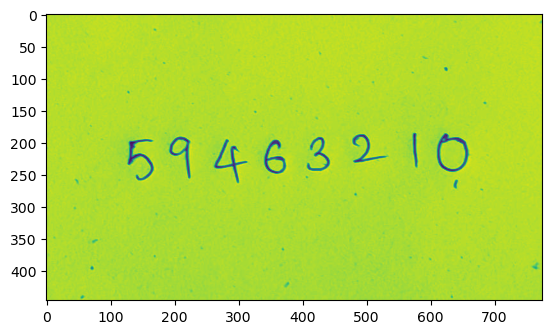

In [59]:
plt.imshow(gray)

In [60]:
_, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

In [61]:
thresh.shape == gray.shape

True

In [62]:
gray[0] , thresh[0]

(array([217, 219, 220, 219, 217, 217, 218, 219, 216, 216, 219, 222, 221,
        216, 216, 218, 218, 218, 218, 218, 218, 218, 218, 218, 218, 219,
        219, 218, 216, 216, 218, 220, 221, 220, 219, 220, 220, 219, 216,
        214, 222, 220, 219, 220, 222, 221, 217, 213, 221, 221, 222, 221,
        219, 216, 214, 212, 221, 221, 221, 220, 220, 220, 219, 219, 227,
        223, 218, 216, 218, 219, 217, 214, 220, 219, 216, 214, 213, 216,
        222, 226, 225, 223, 221, 220, 219, 220, 222, 223, 217, 218, 220,
        221, 222, 221, 220, 219, 220, 221, 222, 222, 220, 220, 221, 222,
        220, 220, 221, 222, 222, 221, 220, 220, 221, 223, 223, 222, 219,
        218, 218, 219, 222, 222, 221, 220, 219, 218, 217, 216, 221, 220,
        219, 219, 221, 222, 221, 220, 217, 217, 216, 217, 218, 221, 223,
        225, 223, 217, 211, 210, 214, 218, 220, 221, 216, 216, 214, 214,
        214, 216, 217, 219, 222, 221, 220, 219, 218, 218, 218, 218, 217,
        217, 219, 220, 221, 222, 222, 221, 222, 220

In [63]:
# Find contours in the image
# This line finds contours in the binary image thresh. The cv2.findContours function is used for this purpose. The parameters are as follows:
# thresh: The binary image on which contours are to be found.
# cv2.RETR_EXTERNAL: Retrieval mode. It retrieves only the extreme outer contours. Contours are not retrieved from the hierarchy.
# cv2.CHAIN_APPROX_SIMPLE: Approximation method. It compresses horizontal, vertical, and diagonal segments and leaves only their end points. For example, if a contour has a straight line, it will only store the two end points of that line.
# The function returns two values: contours and _. The variable contours contains a list of contours found in the image, where each contour is represented as a list of points. The variable _ is a placeholder for an optional second return value, which is not used in this case.
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [64]:
contours[0]

array([[[ 71, 396]],

       [[ 71, 398]],

       [[ 72, 397]],

       [[ 72, 396]]], dtype=int32)

In [65]:
digit_boxes = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    print(f'x = {x} y = {y}, w = {w}, h = {h}')
# Filter out small contours, adjust this threshold based on your images
    if w > 5 and h > 5:
        digit_boxes.append((x-10, y-10, w+20, h+20))

x = 71 y = 396, w = 2, h = 3
x = 638 y = 261, w = 5, h = 11
x = 342 y = 198, w = 32, h = 52
x = 264 y = 197, w = 50, h = 67
x = 128 y = 197, w = 40, h = 63
x = 408 y = 194, w = 35, h = 51
x = 193 y = 193, w = 32, h = 64
x = 480 y = 189, w = 50, h = 44
x = 611 y = 188, w = 48, h = 59
x = 574 y = 187, w = 6, h = 52
x = 623 y = 85, w = 4, h = 4


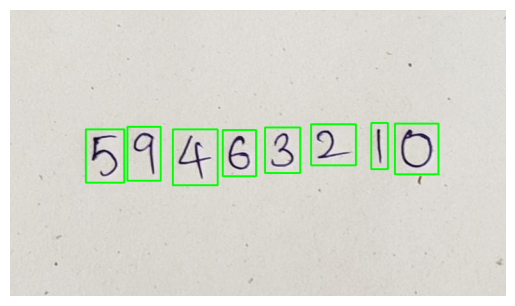

In [66]:
show_image_with_boxes(image_path, digit_boxes)

In [67]:
digit_boxes

[(332, 188, 52, 72),
 (254, 187, 70, 87),
 (118, 187, 60, 83),
 (398, 184, 55, 71),
 (183, 183, 52, 84),
 (470, 179, 70, 64),
 (601, 178, 68, 79),
 (564, 177, 26, 72)]

In [68]:
digit_boxes = sorted(digit_boxes, key=lambda x: x[0])

digit_boxes

[(118, 187, 60, 83),
 (183, 183, 52, 84),
 (254, 187, 70, 87),
 (332, 188, 52, 72),
 (398, 184, 55, 71),
 (470, 179, 70, 64),
 (564, 177, 26, 72),
 (601, 178, 68, 79)]

1/1 [==============================] - 0s 33ms/step


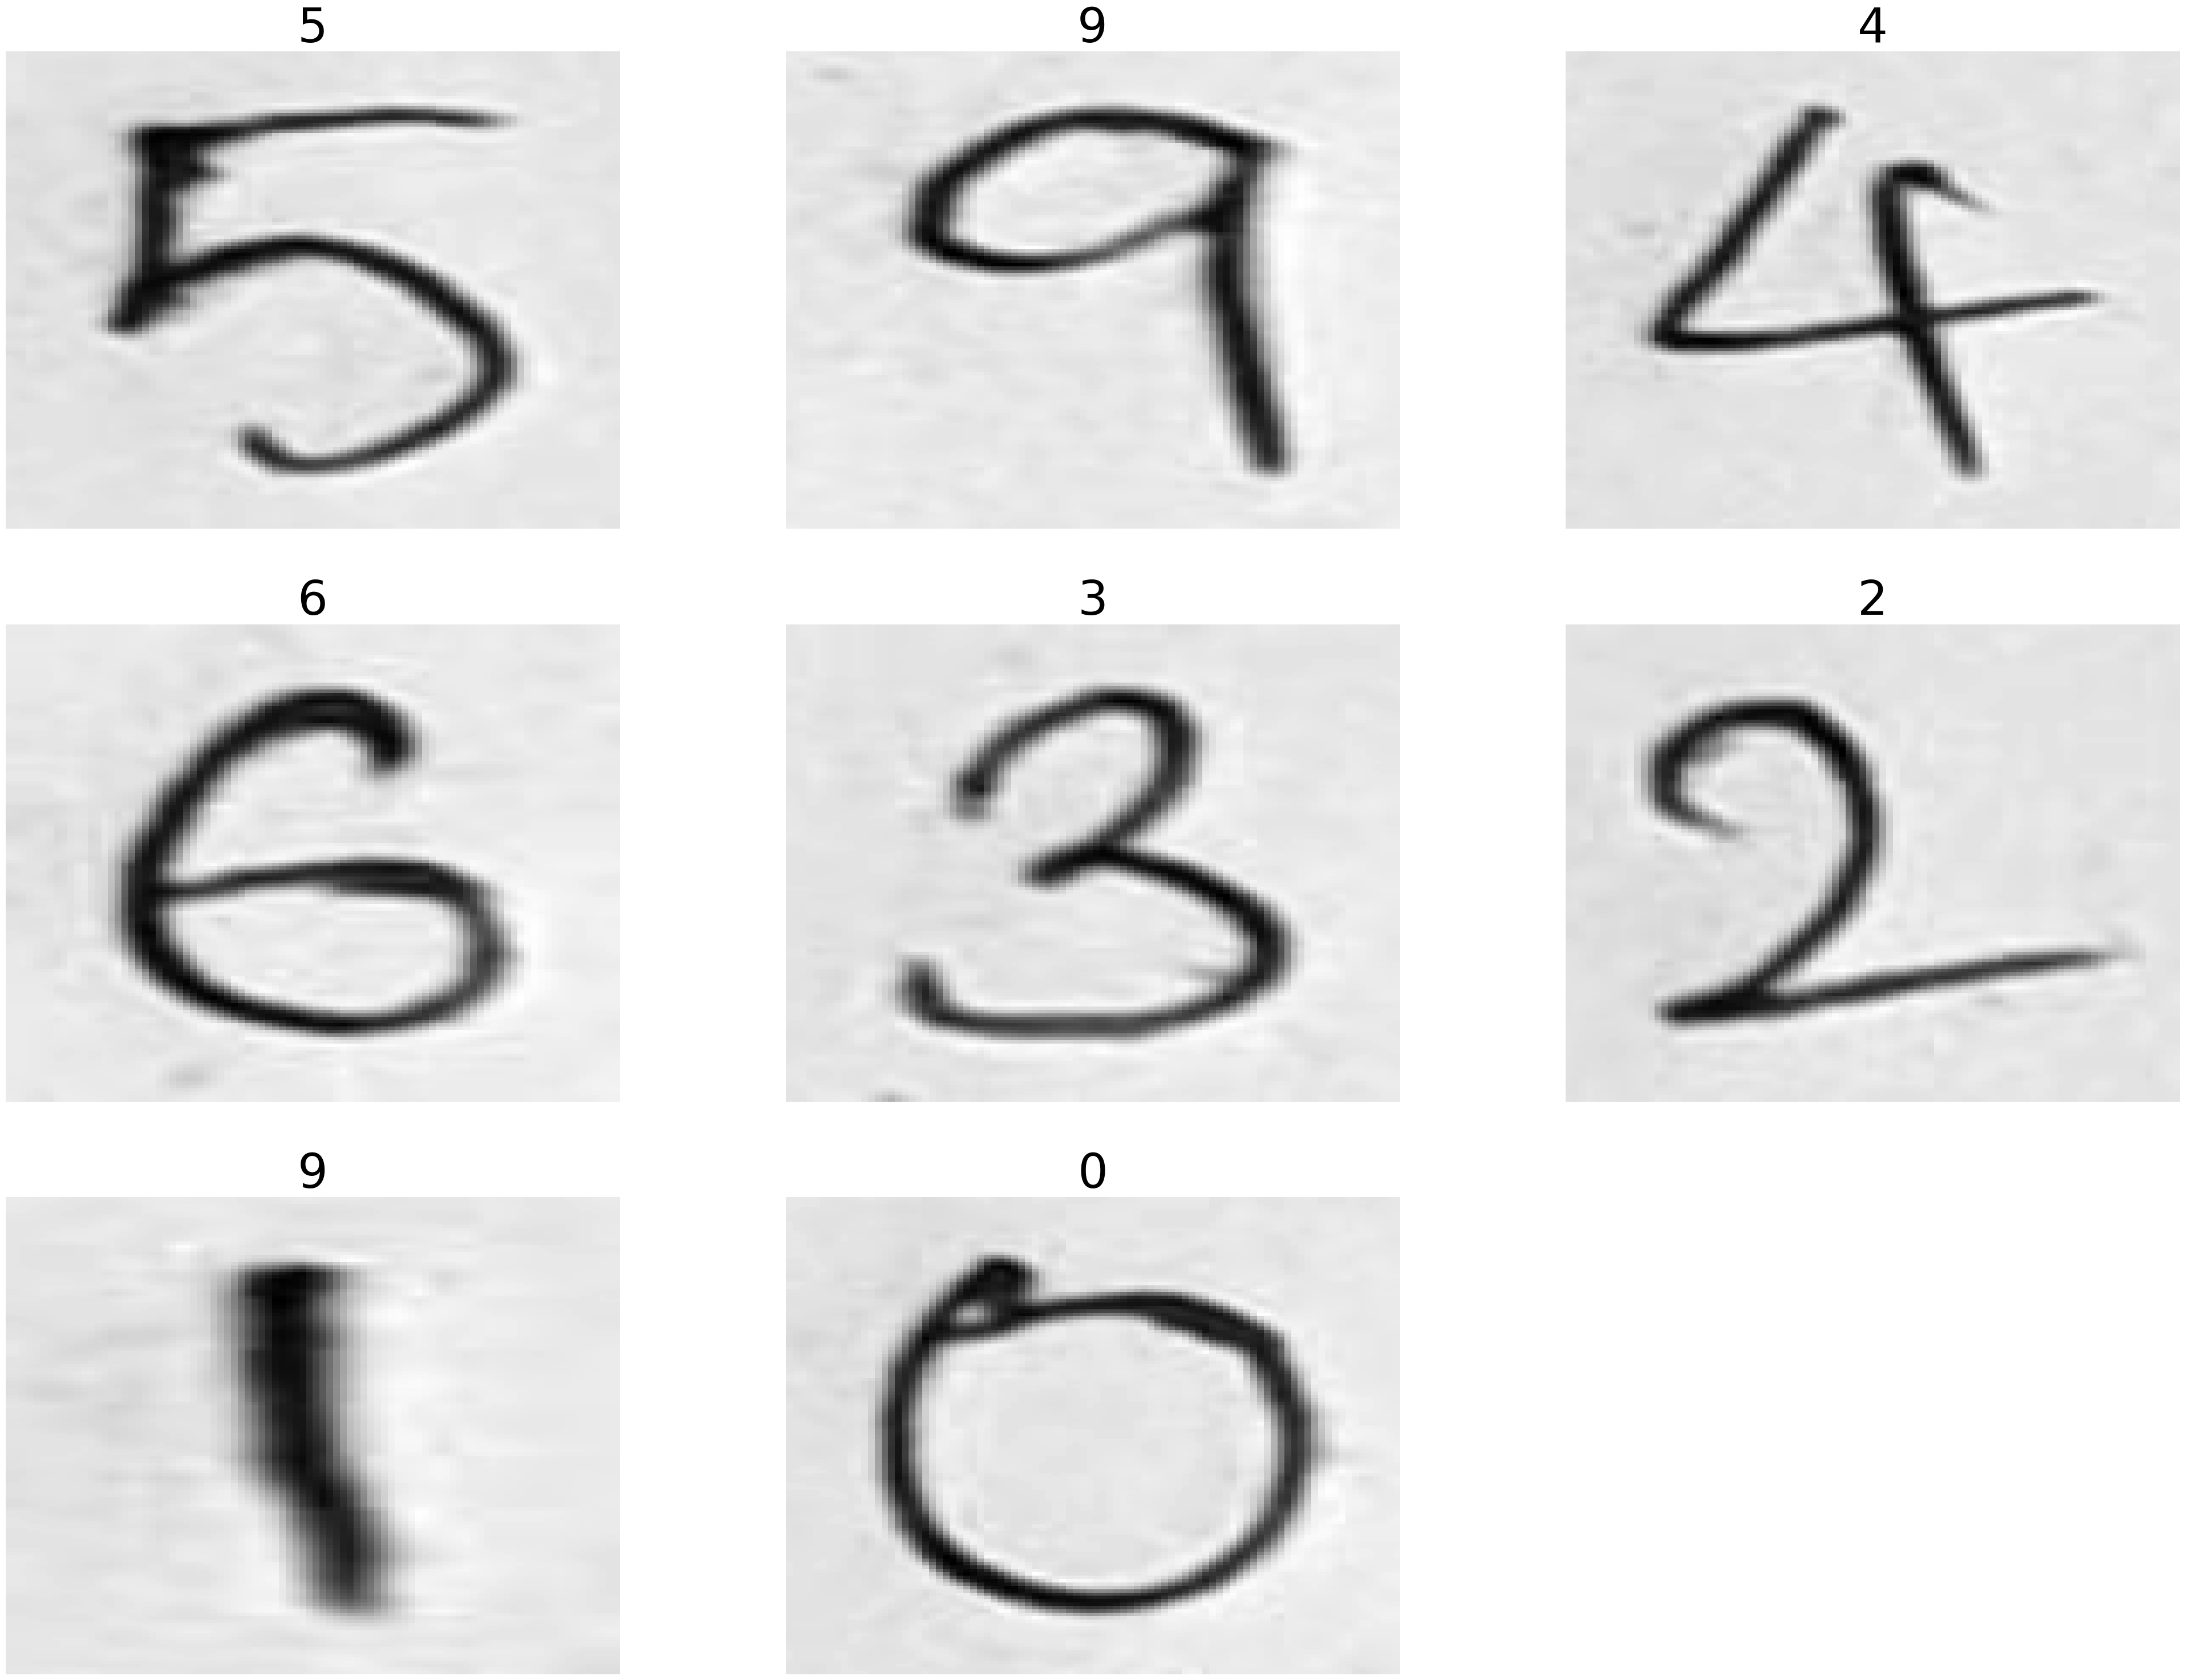

In [76]:
speech=''
i=0
plt.figure(figsize=(50,50))
for box in digit_boxes:
    i=i+1
    x, y, w, h = box
    if (x or y or w or h) <0 :
        continue
    roi = gray[y:y+h, x:x+w]
    roi = cv2.resize(roi, (90,140))
    sp = plt.subplot((len(digit_boxes))//2,3,i)
    sp.axis('off')
    duplicate_roi=roi
    roi=np.expand_dims(roi,axis=0)
    roi=roi/255.0
    pred_value=model.predict(roi).argmax()
    speech+=str(pred_value) + ','
    plt.title(pred_value,fontsize=60)
    plt.imshow(duplicate_roi,cmap='gray',aspect=0.5)
plt.show()

In [70]:
from gtts import gTTS
import os

In [71]:
def text_to_speech(text,language='en',filename='output.mp3'):
    #create a gtts object
    tts=gTTS(text=text,lang=language,slow=False)
    
    #save the speech as mp3 file
    tts.save(filename)
    
    #play the audio
    os.system(f'start {filename}')

In [77]:
#example 
text = "the predicted values are :"+speech
text_to_speech(text=text)